In [1]:
import warnings

# Disable all warnings globally
warnings.simplefilter('ignore')

In [3]:
from datasets import load_dataset
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
import tqdm

In [4]:
dataset = load_dataset("graphs-datasets/MUTAG")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
class GraphVisualization: 
    def __init__(self):
        self.visual = [] 
    def addEdge(self, a, b): 
        temp = [a, b] 
        self.visual.append(temp) 
    def visualize(self): 
        G = nx.Graph() 
        G.add_edges_from(self.visual) 
        nx.draw_networkx(G) 
        plt.show() 


In [6]:
adjacency_list_n1 = []
adjacency_list_n2 = []
g = GraphVisualization()
n = 0
for t_set in dataset['train']:
    for i in range(len(t_set["edge_index"][0])):
        adjacency_list_n1.append(t_set["edge_index"][0][i] + n)
        adjacency_list_n2.append(t_set["edge_index"][1][i] + n)
    n = n + max(t_set["edge_index"][0])
    if n >= 100:
        break
print(adjacency_list_n1)
print(adjacency_list_n2)

[0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 26, 26, 26, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38, 39, 40, 40, 40, 41, 41, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 46, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 55, 55, 56, 56, 56, 57, 58, 58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 63, 63, 63, 64, 65, 65, 65, 66, 67, 68, 68, 68, 69, 69, 70, 70, 70, 71, 71, 71, 72, 72, 73, 73, 73, 74, 74, 74, 75, 75, 75, 76, 76, 76, 77, 77, 77, 78, 78, 78, 79, 79, 80, 80, 80, 81, 81, 81, 82, 82, 83, 83, 84, 84, 84, 85, 86, 87, 87, 87, 88, 89, 90, 90, 90, 91, 92, 93, 93, 93, 94, 95, 95, 96, 96, 96, 97, 97, 98, 98, 98, 99, 99, 100, 100, 101, 101, 101, 102, 102, 102, 103, 104, 105, 105, 105, 106, 106, 107, 107, 108, 1

100%|██████████| 110/110 [00:00<00:00, 5013.46it/s]


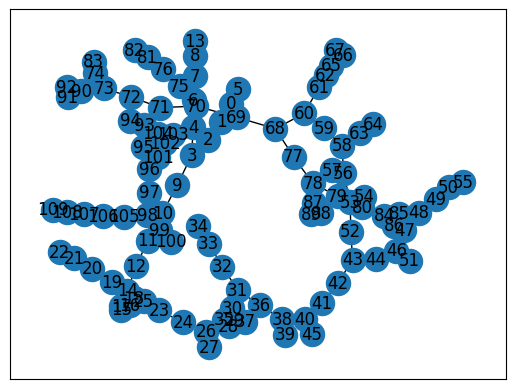

In [7]:
adjacency_matrix = np.zeros((n,n), bool)
for i in range(n):
    if i in adjacency_list_n1:
        adjacency_matrix[i][adjacency_list_n2[adjacency_list_n1.index(i)]] = 1
        adjacency_matrix[adjacency_list_n2[adjacency_list_n1.index(i)]][i] = 1
for i in tqdm.tqdm(range(n)):
    for j in range(n):
        if adjacency_matrix[i][j] == True:
            g.addEdge(i, j)
g.visualize()

In [8]:
def dfs(adj_matrix, visited, node):
    visited[node] = True
    for i in range(len(adj_matrix)):
        if adj_matrix[node][i] == 1 and not visited[i]:
            dfs(adj_matrix, visited, i)
def is_connected(adj_matrix):
    num_nodes = len(adj_matrix)
    visited = [False] * num_nodes
    dfs(adj_matrix, visited, 0)
    return all(visited)

is_connected(adjacency_matrix)

True

In [12]:
from keras.layers import Input, Dropout, Dense
from keras.models import Model
from keras import activations
from keras.optimizers import Adam

In [13]:
adjacency_matrix = adjacency_matrix.tolist()

In [14]:
num_nodes = len(adjacency_matrix)
embedding_dim = 64
node_embeddings = np.random.randn(num_nodes, embedding_dim)

def graphsage_update(adj_matrix, node_embeddings, node, dim=64):
    neighbors = np.where(adj_matrix[node] == 1)[0] 
    if len(neighbors) == 0:
        return node_embeddings[node]
    else:
        neighbor_embeddings = node_embeddings[neighbors]
        aggregated_embedding = np.mean(neighbor_embeddings, axis=0)
        return aggregated_embedding

num_iterations = 10
for _ in range(num_iterations):
    updated_embeddings = np.zeros_like(node_embeddings)
    for i in range(num_nodes):
        updated_embeddings[i] = graphsage_update(adjacency_matrix, node_embeddings, i)
    node_embeddings = updated_embeddings

print(node_embeddings)

[[ 0.98931469  0.71202473  0.14099668 ... -1.11421399 -0.87644169
  -1.69480687]
 [-2.99312966 -0.53915591 -0.9884726  ... -0.15353151  0.27613302
   2.13254301]
 [-0.95550296 -0.20974791  1.37640734 ...  1.74557034 -0.09916432
  -0.87759882]
 ...
 [-1.23632948  0.50755058 -0.29570585 ...  1.74947781 -1.57238333
  -0.56361531]
 [ 2.54168732  0.13988029  1.30983227 ...  0.5306448  -0.52972005
   0.12215076]
 [-0.19841757 -0.69101519 -1.73072545 ...  0.2338087  -0.45217247
  -0.77245447]]


In [15]:
adjacency_matrix = np.array(adjacency_matrix)
num_nodes = len(adjacency_matrix)
embedding_dim = 64
node_embeddings = np.random.randn(num_nodes, embedding_dim)

def gcn_propagate(adj_matrix, node_embeddings, dim=64):
    normalized_adj = adj_matrix / adj_matrix.sum(axis=1, keepdims=True)
    updated_embeddings = np.dot(normalized_adj, node_embeddings)
    return updated_embeddings

num_iterations = 10
for _ in range(num_iterations):
    node_embeddings = gcn_propagate(adjacency_matrix, node_embeddings)

print(node_embeddings)

[[ 0.13845857 -0.09943251 -0.60218562 ...  0.16691428  0.80250197
   0.35912375]
 [-0.29930392  0.19542678 -0.19448901 ... -0.45846977  0.84763742
  -0.82299617]
 [ 0.26411446 -0.15537388 -0.62169011 ...  0.26700994  0.49577335
   0.15471232]
 ...
 [ 0.24926551 -0.25506867  0.08801451 ...  0.23131163 -0.23614142
  -0.10143788]
 [-0.88367273 -0.03714088 -0.59419314 ...  0.45024922 -0.04384683
  -1.46527529]
 [ 0.29544985 -0.31030712  0.02531637 ...  0.17404628 -0.35345423
   0.06268548]]


In [16]:
from gensim.models import Word2Vec

graph = adjacency_matrix.tolist()
num_walks = 10 
walk_length = 10
walks = []

for node in range(len(graph)):
    for _ in range(num_walks):
        walk = [str(node)]
        current_node = node
        for _ in range(walk_length - 1):
            neighbors = [str(neighbor) for neighbor, edge_exists in enumerate(graph[current_node]) if edge_exists]
            next_node = np.random.choice(neighbors)
            walk.append(next_node)
            current_node = int(next_node)
        walks.append(walk)

model = Word2Vec(walks, vector_size=64, window=5, min_count=0, sg=1, workers=4, epochs=20)

node_embeddings = {}
for node in range(len(graph)):
    node_embeddings[str(node)] = model.wv[str(node)]

for node, embedding in node_embeddings.items():
    print(f"Node {node}: {embedding}", len(embedding))

Node 0: [-0.0084348   0.9210412   0.6845854  -0.25787297  0.7923354  -0.8075956
  0.5722831   0.60730064 -0.15574276 -0.5048246   0.32975325 -0.09540852
  0.08717204  0.42069522  0.4178068  -0.3126823  -0.11304603  0.14785431
  0.29919615  0.3127596   0.5449048  -0.15706986  0.58909273 -0.15608546
 -0.12354688  0.13568752  0.31732988  1.3769476   0.4766971   0.2438951
 -0.04327095  0.4264593   0.09674668  0.518937   -0.37915555 -0.7287779
  0.02166732  1.3015326   0.00270508 -0.26369235  0.10817569  0.8223054
  0.32536876  0.7676823   0.27818188  0.6641458   0.00744429 -0.13751598
  0.53464    -0.19824922 -0.47320354  0.27524567 -0.14973441  0.8073553
  0.8907057   0.41245228 -0.3699432   0.36352196 -0.26164627 -0.21055774
  0.31746534  0.15684633  0.35327297 -0.02051365] 64
Node 1: [-0.00175644  0.8786102   0.6332196  -0.22889791  0.7734398  -0.8422626
  0.7086867   0.5511062  -0.12947291 -0.50597304  0.37019834 -0.07334464
  0.11012065  0.33983096  0.38250676 -0.29655814  0.07692594 